<a href="https://colab.research.google.com/github/andyradz/aplios.solutions/blob/master/introduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praca dyplomowa
##### Student    :: Andrzej Radziszewski

##### Kierunek   :: BigData

##### Nr indeksu :: 0000

# Konfiguracja środowiska

#### Montowanie zasobu Google Drive Volume

In [1]:
## MOUNT GOOGLE DRIVE VOLUME

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Listowanie zawartości zasobu Google Drive Volume


In [2]:
## LIST GOOGLE DRIVE VOLUME
!ls -laFtA --full-time /content/gdrive 

### CREATE REQUIRED DATA FOLDERS

!mkdir input
!mkdir output

total 16
dr-x------  2 root root 4096 2023-04-06 11:25:48.000000000 +0000 .file-revisions-by-id/
drwx------ 22 root root 4096 2023-04-06 11:25:48.000000000 +0000 MyDrive/
dr-x------  2 root root 4096 2023-04-06 11:25:48.000000000 +0000 .shortcut-targets-by-id/
drwx------  5 root root 4096 2023-04-06 11:25:48.000000000 +0000 .Trash-0/
mkdir: cannot create directory ‘input’: File exists
mkdir: cannot create directory ‘output’: File exists


#### Instalacja komponentu Java Development Kit

In [3]:
### DOWNLOAD AND INSTALL JAVA VIRTUAL MACHINE(JVM)

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#### Instalacja komponentu Hadoop

In [4]:
### DOWNLOAD APACHE SPARK AND HADOOP ENVIRONMENT
!wget https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz > /dev/null

### UNZIP SPARK ENVIRONMENT
!tar xf spark-3.3.1-bin-hadoop3.tgz > /dev/null

--2023-04-06 11:30:42--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-04-06 11:30:42 ERROR 404: Not Found.

tar: spark-3.3.1-bin-hadoop3.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


#### Ustawienie zmiennych środowiskowych dla Python

In [5]:
### SET SYSTEM VARIABLES FOR PYSPARK

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.1-bin-hadoop3'
os.environ['PYSPARK_SUBMIT_ARGS'] = '---jars /content/spark-3.3.1-bin-hadoop3/jars/spark-xml_2.12-0.11.0.jar pyspark-shell'

#### Instalacja komponentu PySpark

In [2]:
### INSTALL PYSPARK ENVIRONMENT
!pip install -q pyspark > /dev/null

### INSTALL LIBRARY FIND PYSPARK
!pip install -q findspark > /dev/null

### INITIAL PYSPARK ENVIRONMENT
import findspark
findspark.init()

### CHECK PYSPARK LOCATION
findspark.find()


'/usr/local/lib/python3.9/dist-packages/pyspark'

 #### Instalacja aplikacji 7Zip

In [3]:
!sudo apt install --assume-yes p7zip-full

!type(7z)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/bin/bash: -c: line 0: syntax error near unexpected token `7z'
/bin/bash: -c: line 0: `type(7z)'


#### Listowanie pakietów Python

In [4]:
### LIST PYTHON INSTALLED PACKAGES

!pip3 list -v


Package                       Version              Location                               Installer
----------------------------- -------------------- -------------------------------------- ---------
absl-py                       1.4.0                /usr/local/lib/python3.9/dist-packages pip
alabaster                     0.7.13               /usr/local/lib/python3.9/dist-packages pip
albumentations                1.2.1                /usr/local/lib/python3.9/dist-packages pip
altair                        4.2.2                /usr/local/lib/python3.9/dist-packages pip
anyio                         3.6.2                /usr/local/lib/python3.9/dist-packages pip
appdirs                       1.4.4                /usr/local/lib/python3.9/dist-packages pip
argon2-cffi                   21.3.0               /usr/local/lib/python3.9/dist-packages pip
argon2-cffi-bindings          21.2.0               /usr/local/lib/python3.9/dist-packages pip
arviz                         0.15.1            

 # Pobranie archiwum danych z Stackexchange

In [5]:
!wget https://archive.org/download/stackexchange/webapps.stackexchange.com.7z -P /content/input/ > /dev/null

--2023-04-06 11:32:33--  https://archive.org/download/stackexchange/webapps.stackexchange.com.7z
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia800107.us.archive.org/27/items/stackexchange/webapps.stackexchange.com.7z [following]
--2023-04-06 11:32:33--  https://ia800107.us.archive.org/27/items/stackexchange/webapps.stackexchange.com.7z
Resolving ia800107.us.archive.org (ia800107.us.archive.org)... 207.241.232.17
Connecting to ia800107.us.archive.org (ia800107.us.archive.org)|207.241.232.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69259627 (66M) [application/x-7z-compressed]
Saving to: ‘/content/input/webapps.stackexchange.com.7z’

webapps.stackexchan 100%[===================>]  66.05M  5.03MB/s    in 42s     

2023-04-06 11:33:15 (1.58 MB/s) - ‘/content/input/webapps.stackexchange.com.7z’ saved [69259627/6

#### Rozpakowanie archiwum danych

In [6]:
####EXTRACT DATA FROM 7ZIP ARCHIWUM
!7za e -y /content/input/webapps.stackexchange.com.7z -o/content/input/ > /dev/null

# Utworzenie sesji środowiska PySpark

In [7]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, LongType, StringType, BooleanType, DateType 
from pyspark.sql.functions import to_timestamp, date_format, col

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName('ARDiplomaWork') \
    .config('spark.jars.packages', 'com.databricks:spark-xml_2.12:0.6.0') \
    .getOrCreate()

# Tworzenie struktur analitycznych w formacie Parquet

#### Odczyt, partycjonowanie i zapis zbioru POSTS.XML

In [8]:
schema = StructType([ \
    StructField("_AnswerCount", LongType(), True), \
    StructField("_Body", StringType(), True), \
    StructField("_CommentCount", LongType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_LastActivityDate", StringType(), True), \
    StructField("_OwnerUserId", LongType(), True), \
    StructField("_ParentId", LongType(), True), \
    StructField("_PostTypeId", LongType(), True), \
    StructField("_AcceptedAnswerId", LongType(), True), \
    StructField("_Score", LongType(), True), \
    StructField("_Tags", StringType(), True), \
    StructField("_Title", StringType(), True), \
    StructField("_ViewCount", LongType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True) \
]) 

postsDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='posts') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Posts.xml')     

postsDF = postsDF \
          .withColumnRenamed("_AnswerCount", "AnswerCount") \
          .withColumnRenamed("_Body", "Body") \
          .withColumnRenamed("_CommentCount", "CommentCount") \
          .withColumnRenamed("_CreationDate", "CreationDate") \
          .withColumnRenamed("_Id", "Id") \
          .withColumnRenamed("_LastActivityDate", "LastActivityDate") \
          .withColumnRenamed("_OwnerUserId", "OwnerUserId") \
          .withColumnRenamed("_ParentId", "ParentId") \
          .withColumnRenamed("_PostTypeId", "PostTypeId") \
          .withColumnRenamed("_AcceptedAnswerId", "AcceptedAnswerId") \
          .withColumnRenamed("_Score", "Score") \
          .withColumnRenamed("_Tags", "Tags") \
          .withColumnRenamed("_Title", "Title") \
          .withColumnRenamed("_ViewCount", "ViewCount")

postsDF = postsDF \
          .select(["Id", "ParentId", "PostTypeId", "AcceptedAnswerId", "OwnerUserId", \
                  to_timestamp("CreationDate").alias("CreationDate"), "Score", \
                  "ViewCount", "AnswerCount", \
                  "CommentCount", to_timestamp("LastActivityDate").alias("LastActivityDate"), \
                  "Tags", "Title", "Body"]) \
          .withColumn("Year", date_format(col("CreationDate"), "y").cast("integer")) \
          .withColumn("Month", date_format(col("CreationDate"), "M").cast("integer")) \
          .withColumn("Day", date_format(col("CreationDate"), "d").cast("integer")) \

postsDF.printSchema()   
postsDF.show(n=10, truncate=False)

postsDF = postsDF \
          .write \
          .partitionBy("Year", "Month", "Day") \
          .mode("overwrite") \
          .parquet("/content/output/posts.parquet")      

root
 |-- Id: long (nullable = true)
 |-- ParentId: long (nullable = true)
 |-- PostTypeId: long (nullable = true)
 |-- AcceptedAnswerId: long (nullable = true)
 |-- OwnerUserId: long (nullable = true)
 |-- CreationDate: timestamp (nullable = true)
 |-- Score: long (nullable = true)
 |-- ViewCount: long (nullable = true)
 |-- AnswerCount: long (nullable = true)
 |-- CommentCount: long (nullable = true)
 |-- LastActivityDate: timestamp (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Body: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)

+---+--------+----------+----------------+-----------+-----------------------+-----+---------+-----------+------------+-----------------------+------------------------------------------------+-------------------------------------------------------------------+--------------------------------------------------------------

#### Odczyt, partycjonowanie i zapis zbioru BADGES.XML

In [9]:
schema = StructType([ \
    StructField("_Class", LongType(), True), \
    StructField("_Date", StringType(), True), \
    StructField("_CommentCount", LongType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_Name", StringType(), True), \
    StructField("_TagBased", BooleanType(), True), \
    StructField("_UserId", LongType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)
])

badgesDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='badges') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Badges.xml')

badgesDF = badgesDF \
           .withColumnRenamed("_Class", "Class") \
           .withColumnRenamed("_Date", "Date") \
           .withColumnRenamed("_CommentCount", "CommentCount") \
           .withColumnRenamed("_Id", "Id") \
           .withColumnRenamed("_Name", "Name") \
           .withColumnRenamed("_TagBased", "TagBased") \
           .withColumnRenamed("_UserId", "UserId")

badgesDF = badgesDF \
           .select(["Id", "UserId", "Class", "Date", "CommentCount", "TagBased","Name"]) \
           .withColumn("Year", date_format(col("Date"), "y").cast("integer")) \
           .withColumn("Month", date_format(col("Date"), "M").cast("integer")) \
           .withColumn("Day", date_format(col("Date"), "d").cast("integer"))

badgesDF.printSchema()
badgesDF.show(n=10, truncate=False)

badgesDF = badgesDF \
          .write \
          .partitionBy("Year", "Month", "Day") \
          .mode("overwrite") \
          .parquet("/content/output/badges.parquet")

root
 |-- Id: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- Class: long (nullable = true)
 |-- Date: string (nullable = true)
 |-- CommentCount: long (nullable = true)
 |-- TagBased: boolean (nullable = true)
 |-- Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)

+---+------+-----+-----------------------+------------+--------+-------+----+-----+---+
|Id |UserId|Class|Date                   |CommentCount|TagBased|Name   |Year|Month|Day|
+---+------+-----+-----------------------+------------+--------+-------+----+-----+---+
|1  |10    |3    |2010-06-30T20:33:03.520|null        |false   |Teacher|2010|6    |30 |
|2  |20    |3    |2010-06-30T20:33:03.520|null        |false   |Teacher|2010|6    |30 |
|3  |22    |3    |2010-06-30T20:33:03.520|null        |false   |Teacher|2010|6    |30 |
|4  |25    |3    |2010-06-30T20:33:03.520|null        |false   |Teacher|2010|6    |30 |
|5  |32  

#### Odczyt, partycjonowanie i zapis zbioru COMMENTS.XML

In [10]:
schema = StructType([ \
    StructField("_ContentLicense", StringType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_PostId", LongType(), True), \
    StructField("_Score", LongType(), True), \
    StructField("_Text", StringType(), True), \
    StructField("_UserDisplayName", StringType(), True), \
    StructField("_UserId", LongType(), True),
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)        
])

commentsDF = spark.read \
            .format('com.databricks.spark.xml') \
            .options(rootTag='comments') \
            .options(rowTag='row') \
            .schema(schema) \
            .load('/content/input/Comments.xml')

commentsDF = commentsDF \
             .withColumnRenamed("_ContentLicense", "ContentLicense") \
             .withColumnRenamed("_CreationDate", "CreationDate") \
             .withColumnRenamed("_Id", "Id") \
             .withColumnRenamed("_PostId", "PostId") \
             .withColumnRenamed("_Score", "Score") \
             .withColumnRenamed("_Text", "Text") \
             .withColumnRenamed("_UserDisplayName", "UserDisplayName") \
             .withColumnRenamed("_UserId", "UserId") \

commentsDF = commentsDF \
            .select(["Id", "PostId", "UserId", "CreationDate", "ContentLicense", \
                    "UserDisplayName", "Score", "Text"]) \
            .withColumn("Year", date_format(col("CreationDate"), "y").cast("integer")) \
            .withColumn("Month", date_format(col("CreationDate"), "M").cast("integer")) \
            .withColumn("Day", date_format(col("CreationDate"), "d").cast("integer"))

commentsDF.printSchema()
commentsDF.show(n=10, truncate=False)

commentsDF = commentsDF \
            .write \
            .partitionBy("Year", "Month", "Day") \
            .mode("overwrite") \
            .parquet("/content/output/comments.parquet")

root
 |-- Id: long (nullable = true)
 |-- PostId: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- CreationDate: string (nullable = true)
 |-- ContentLicense: string (nullable = true)
 |-- UserDisplayName: string (nullable = true)
 |-- Score: long (nullable = true)
 |-- Text: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)

+---+------+------+-----------------------+--------------+---------------+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+-----+---+
|Id |PostId|UserId|CreationDate           |ContentLicense|UserDisplayName|Score|Text                                                                                                 

#### Odczyt, partycjonowanie i zapis zbioru POSTHISTORY.XML

In [11]:
schema = StructType([ \
    StructField("_Comment", StringType(), True), \
    StructField("_ContentLicense", StringType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_PostHistoryTypeId", LongType(), True), \
    StructField("_PostId", LongType(), True), \
    StructField("_RevisionGUID", StringType(), True), \
    StructField("_Text", StringType(), True), \
    StructField("_UserDisplayName", StringType(), True), \
    StructField("_UserId", LongType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)    
])

postHistoryDF = spark.read \
                .format('com.databricks.spark.xml') \
                .options(rootTag='posthistory') \
                .options(rowTag='row') \
                .schema(schema) \
                .load('/content/input/PostHistory.xml')
               
postHistoryDF = postHistoryDF \
                .withColumnRenamed("_Comment", "Comment") \
                .withColumnRenamed("_ContentLicense", "ContentLicense") \
                .withColumnRenamed("_CreationDate", "CreationDate") \
                .withColumnRenamed("_Id", "Id") \
                .withColumnRenamed("_PostHistoryTypeId", "PostHistoryTypeId") \
                .withColumnRenamed("_PostId", "PostId") \
                .withColumnRenamed("_RevisionGUID", "RevisionGUID") \
                .withColumnRenamed("_Text", "Text") \
                .withColumnRenamed("_UserDisplayName", "UserDisplayName") \
                .withColumnRenamed("_UserId", "UserId") \

postHistoryDF = postHistoryDF \
                .select(["Id", "PostId", "PostHistoryTypeId", "UserId", \
                         "CreationDate", "RevisionGUID", "ContentLicense", "UserDisplayName", "Comment", "Text"]) \
                .withColumn("Year", date_format(col("CreationDate"), "y").cast("integer")) \
                .withColumn("Month", date_format(col("CreationDate"), "M").cast("integer")) \
                .withColumn("Day", date_format(col("CreationDate"), "d").cast("integer"))                       

postHistoryDF.printSchema()
postHistoryDF.show(n=10, truncate=False)  

postHistoryDF = postHistoryDF \
                .write \
                .partitionBy("Year", "Month", "Day") \
                .mode("overwrite") \
                .parquet("/content/output/posthistory.parquet")  

root
 |-- Id: long (nullable = true)
 |-- PostId: long (nullable = true)
 |-- PostHistoryTypeId: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- CreationDate: string (nullable = true)
 |-- RevisionGUID: string (nullable = true)
 |-- ContentLicense: string (nullable = true)
 |-- UserDisplayName: string (nullable = true)
 |-- Comment: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)

+---+------+-----------------+------+-----------------------+------------------------------------+--------------+---------------+-------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+-----+---+
|Id |PostId|PostHistoryTypeId|UserId|CreationDate    

#### Odczyt, partycjonowanie i zapis zbioru TAGS.XML DATASET

In [12]:
schema = StructType([ \
    StructField("_Count", LongType(), True), \
    StructField("_ExcerptPostId", LongType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_TagName", StringType(), True), \
    StructField("_WikiPostId", LongType(), True)    
])

tagsDF = spark.read \
         .format('com.databricks.spark.xml') \
         .options(rootTag='tags') \
         .options(rowTag='row') \
         .schema(schema) \
         .load('/content/input/Tags.xml')

tagsDF = tagsDF \
         .withColumnRenamed("_Count", "Count") \
         .withColumnRenamed("_ExcerptPostId", "ExcerptPostId") \
         .withColumnRenamed("_Id", "Id") \
         .withColumnRenamed("_TagName", "TagName") \
         .withColumnRenamed("_WikiPostId", "WikiPostId")

tagsDF = tagsDF \
        .select(["Id", "ExcerptPostId", "WikiPostId", "Count", "TagName"])

tagsDF.printSchema()
tagsDF.show(n=10, truncate=False)

tagsDF = tagsDF \
         .write \
         .partitionBy("Id") \
         .mode("overwrite") \
         .parquet("/content/output/tags.parquet") 

root
 |-- Id: long (nullable = true)
 |-- ExcerptPostId: long (nullable = true)
 |-- WikiPostId: long (nullable = true)
 |-- Count: long (nullable = true)
 |-- TagName: string (nullable = true)

+---+-------------+----------+-----+------------------+
|Id |ExcerptPostId|WikiPostId|Count|TagName           |
+---+-------------+----------+-----+------------------+
|1  |6404         |6373      |3176 |facebook          |
|2  |20843        |20842     |58   |delete            |
|3  |13439        |13438     |310  |account-management|
|4  |6420         |6291      |4157 |gmail             |
|5  |20668        |20667     |83   |outlook           |
|6  |12816        |12815     |774  |google-calendar   |
|7  |13362        |13361     |44   |sync              |
|8  |12818        |12817     |93   |google-reader     |
|12 |13348        |13347     |356  |email             |
|13 |12471        |12470     |242  |blogger           |
+---+-------------+----------+-----+------------------+
only showing top 10 r

#### Odczyt, partycjonowanie i zapis USERS.XML

In [13]:
from pyspark.sql.functions import *

schema = StructType([ \
    StructField("_AboutMe", StringType(), True), \
    StructField("_AccountId", LongType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_DisplayName", StringType(), True), \
    StructField("_DownVotes", LongType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_LastAccessDate", StringType(), True), \
    StructField("_Location", StringType(), True), \
    StructField("_ProfileImageUrl", StringType(), True), \
    StructField("_Reputation", LongType(), True), \
    StructField("_UpVotes", LongType(), True), \
    StructField("_Views", LongType(), True), \
    StructField("_WebsiteUrl", StringType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)
])

usersDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='Users') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Users.xml')

usersDF = usersDF \
          .withColumnRenamed("_AboutMe", "AboutMe") \
          .withColumnRenamed("_AccountId", "AccountId") \
          .withColumnRenamed("_CreationDate", "CreationDate") \
          .withColumnRenamed("_DisplayName", "DisplayName") \
          .withColumnRenamed("_DownVotes", "DownVotes") \
          .withColumnRenamed("_Id", "Id") \
          .withColumnRenamed("_LastAccessDate", "LastAccessDate") \
          .withColumnRenamed("_Location", "Location") \
          .withColumnRenamed("_ProfileImageUrl", "ProfileImageUrl") \
          .withColumnRenamed("_Reputation", "Reputation") \
          .withColumnRenamed("_UpVotes", "UpVotes") \
          .withColumnRenamed("_Views", "Views") \
          .withColumnRenamed("_WebsiteUrl", "WebsiteUrl") \

usersDF = usersDF \
          .select(["Id", "AccountId", to_timestamp("CreationDate").alias("CreationDate"), \
                  to_timestamp("LastAccessDate").alias("LastAccessDate"), "DownVotes", \
                  "UpVotes", "Reputation", "Views", "WebsiteUrl", "ProfileImageUrl", \
                  "Location", "DisplayName", "AboutMe"           
                  ]) \
          .withColumn("Year", date_format(col("CreationDate"), "y")) \
          .withColumn("Month", date_format(col("CreationDate"), "M")) \
          .withColumn("Day", date_format(col("CreationDate"), "d"))

usersDF.printSchema()
usersDF.show(n=10, truncate=False) 

usersDF = usersDF \
          .write \
          .partitionBy("Year", "Month", "Day") \
          .mode("overwrite") \
          .parquet("/content/output/users.parquet")

root
 |-- Id: long (nullable = true)
 |-- AccountId: long (nullable = true)
 |-- CreationDate: timestamp (nullable = true)
 |-- LastAccessDate: timestamp (nullable = true)
 |-- DownVotes: long (nullable = true)
 |-- UpVotes: long (nullable = true)
 |-- Reputation: long (nullable = true)
 |-- Views: long (nullable = true)
 |-- WebsiteUrl: string (nullable = true)
 |-- ProfileImageUrl: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- DisplayName: string (nullable = true)
 |-- AboutMe: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)

+---+---------+-----------------------+-----------------------+---------+-------+----------+-----+------------------------------+---------------+---------------------------+---------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Odczyt, partycjonowanie i zapis zbioru VOTES.XML

In [14]:
schema = StructType([ \
    StructField("_BountyAmount", LongType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_PostId", LongType(), True), \
    StructField("_UserId", LongType(), True), \
    StructField("_VoteTypeId", LongType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)
])

votesDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='votes') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Votes.xml')

votesDF = votesDF \
          .withColumnRenamed("_BountyAmount", "BountyAmount") \
          .withColumnRenamed("_CreationDate", "CreationDate") \
          .withColumnRenamed("_Id", "Id") \
          .withColumnRenamed("_PostId", "PostId") \
          .withColumnRenamed("_UserId", "UserId") \
          .withColumnRenamed("_VoteTypeId", "VoteTypeId") \

votesDF = votesDF \
          .select(["Id", "PostId", "UserId", "VoteTypeId", \
                  to_timestamp("CreationDate").alias("CreationDate"), "BountyAmount"]) \
          .withColumn("Year", date_format(col("CreationDate"), "y")) \
          .withColumn("Month", date_format(col("CreationDate"), "M")) \
          .withColumn("Day", date_format(col("CreationDate"), "d"))  

votesDF.printSchema()
votesDF.show(n=10, truncate=False) 

votesDF = votesDF \
          .write \
          .partitionBy("Year", "Month", "Day") \
          .mode("overwrite") \
          .parquet("/content/output/votes.parquet")

root
 |-- Id: long (nullable = true)
 |-- PostId: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- VoteTypeId: long (nullable = true)
 |-- CreationDate: timestamp (nullable = true)
 |-- BountyAmount: long (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)

+---+------+------+----------+-------------------+------------+----+-----+---+
|Id |PostId|UserId|VoteTypeId|CreationDate       |BountyAmount|Year|Month|Day|
+---+------+------+----------+-------------------+------------+----+-----+---+
|1  |1     |null  |2         |2010-06-30 00:00:00|null        |2010|6    |30 |
|2  |1     |null  |2         |2010-06-30 00:00:00|null        |2010|6    |30 |
|3  |2     |null  |2         |2010-06-30 00:00:00|null        |2010|6    |30 |
|4  |1     |null  |2         |2010-06-30 00:00:00|null        |2010|6    |30 |
|5  |5     |null  |2         |2010-06-30 00:00:00|null        |2010|6    |30 |
|6  |6     |null  |2 

# Przypadki analizy danych

#### Przypadek analizy 4A
Liczba postów na przestrzeni czasu (lineplot/barplot)

Year   2009    2010   2011   2012    2013   2014   2015   2016   2017   2018  \
Month                                                                          
1       NaN    14.0  538.0  689.0  1070.0  809.0  530.0  684.0  547.0  497.0   
2       NaN    14.0  638.0  614.0   650.0  697.0  529.0  613.0  603.0  360.0   
3       NaN     5.0  591.0  559.0   713.0  673.0  632.0  585.0  685.0  510.0   
4       NaN     2.0  524.0  664.0   679.0  649.0  573.0  579.0  536.0  476.0   
5       NaN    14.0  552.0  825.0   650.0  547.0  632.0  520.0  532.0  444.0   
6       NaN   371.0  594.0  557.0   603.0  429.0  668.0  539.0  421.0  393.0   
7      27.0  2938.0  662.0  611.0   625.0  478.0  740.0  442.0  446.0  557.0   
8      28.0   845.0  507.0  650.0   650.0  487.0  579.0  530.0  623.0  542.0   
9      36.0   684.0  560.0  605.0   550.0  472.0  588.0  497.0  608.0  416.0   
10     25.0   944.0  508.0  752.0   629.0  595.0  629.0  466.0  611.0  433.0   
11     18.0   529.0  865.0  667.0   617.

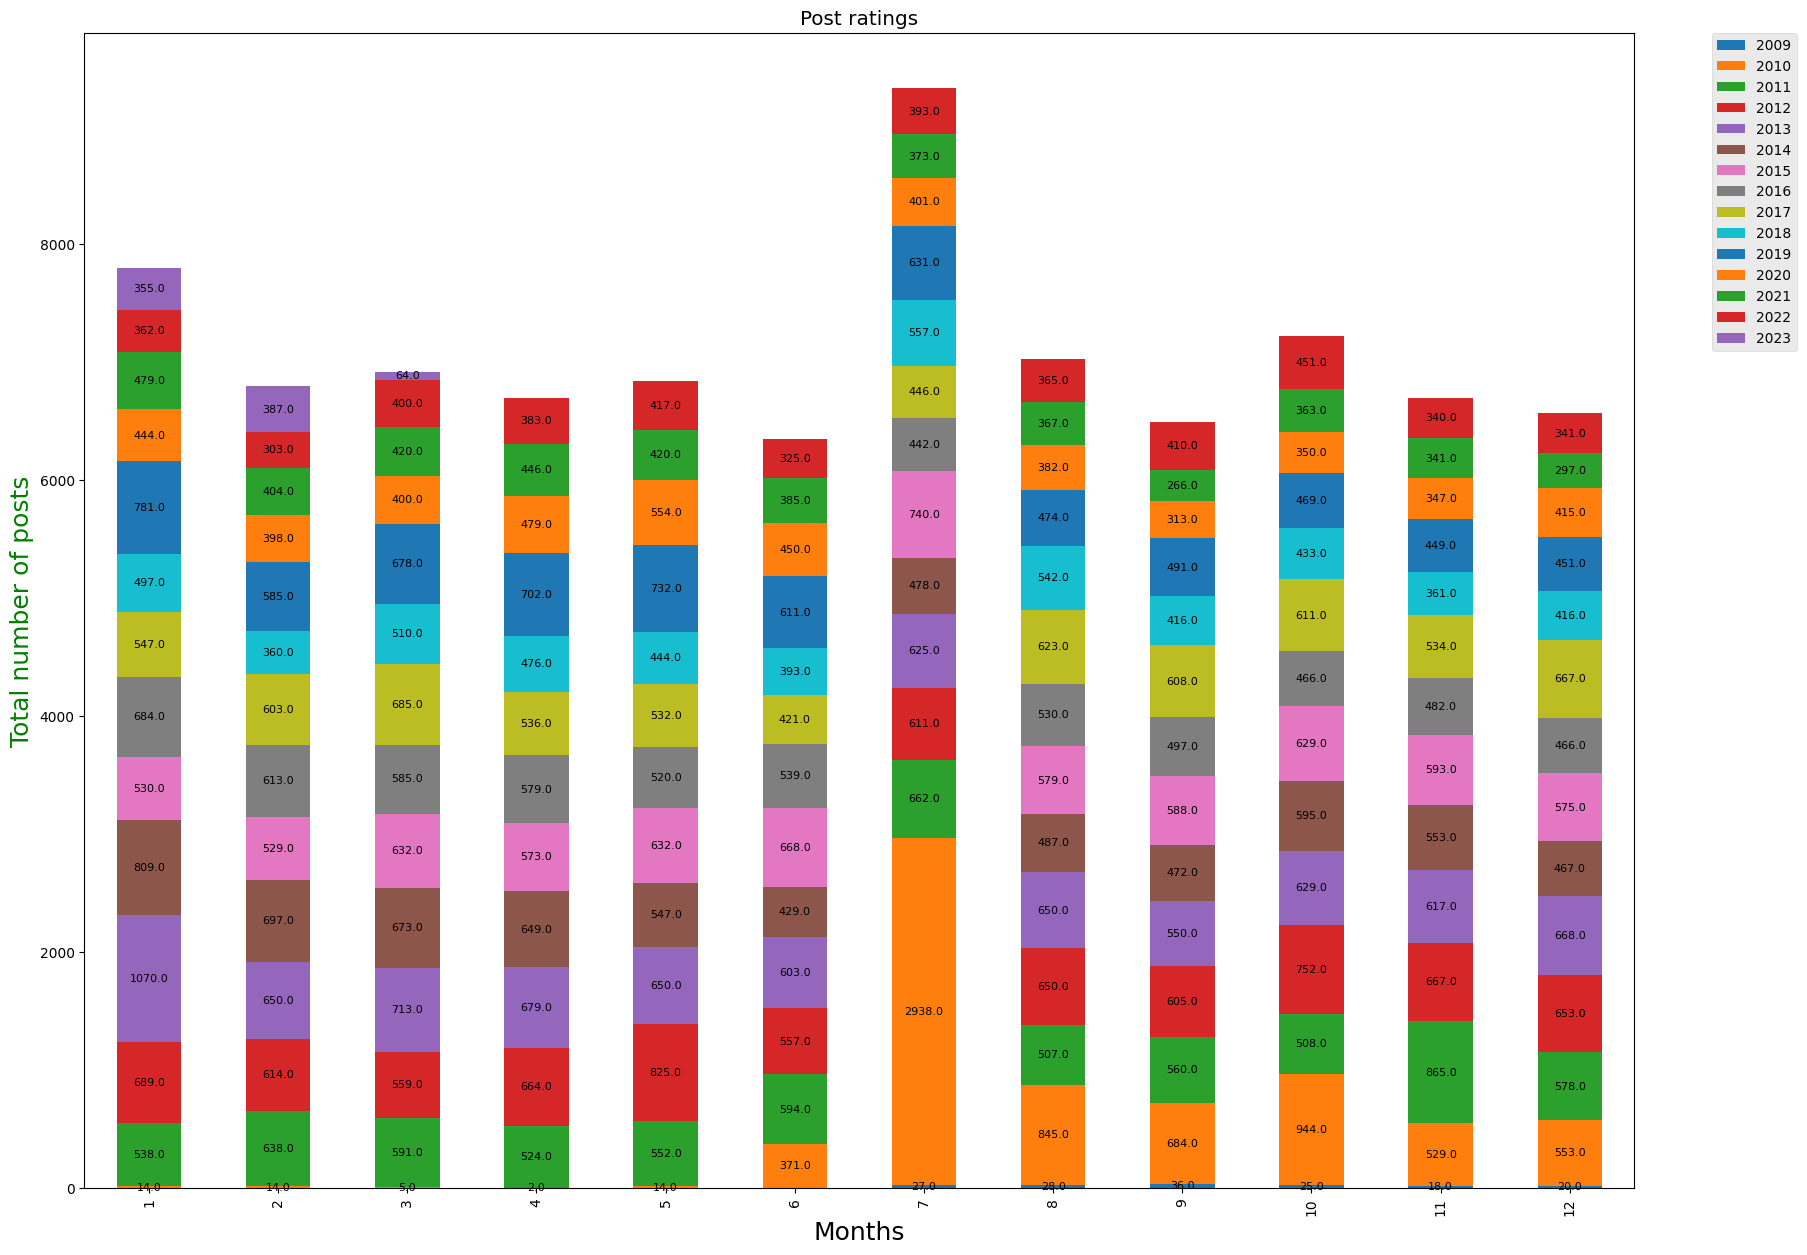

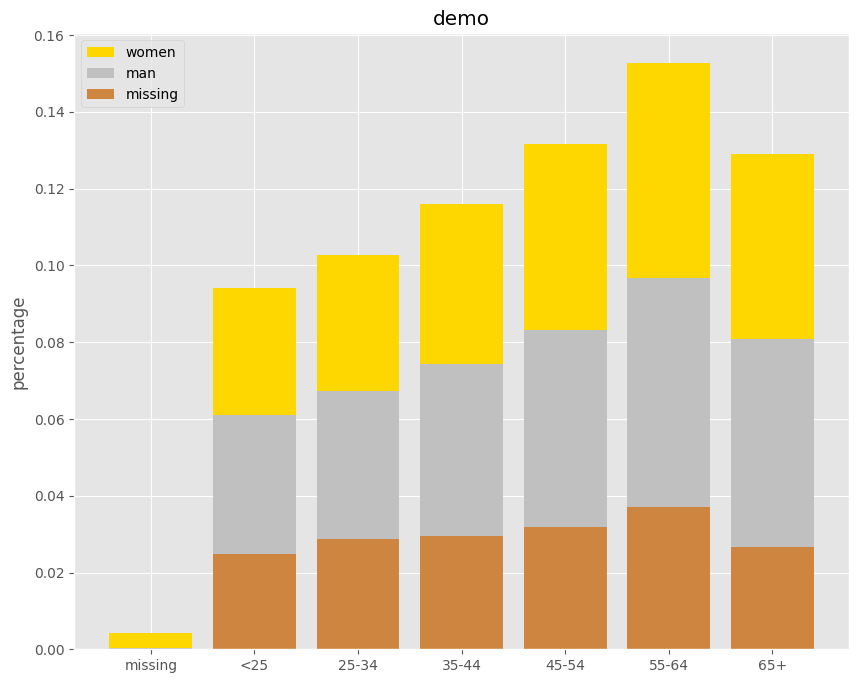

In [15]:
### ANALITYKA POSTS

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = [10, 6]

postsDF1 = spark.read.parquet("/content/output/posts.parquet")

postsDF1 = postsDF1 \
  .groupBy("Year", "Month") \
  .count() \
  .orderBy(col("Year").desc(), col("Month").asc()) \
  .withColumnRenamed("count", "Count") \
  .withColumn("Month1", when(col("Month") == 1, 'Styczneń') \
              .when(col("Month") == 2, 'Luty') \
              .when(col("Month") == 3, 'Marzec') \
              .when(col("Month") == 4, 'Kwiecień') \
              .when(col("Month") == 5, 'Maj') \
              .when(col("Month") == 6, 'Czerwiec') \
              .when(col("Month") == 7, 'Lipiec') \
              .when(col("Month") == 8, 'Sierpień') \
              .when(col("Month") == 9, 'Wrzesień') \
              .when(col("Month") == 10, 'Pażdziernik') \
              .when(col("Month") == 11, 'Listopad') \
              .when(col("Month") == 12, 'Grudzień') \
              .otherwise('Unknown'))

postsDF1 = postsDF1.cache()

pdDF = postsDF1.toPandas()

pdDF = pdDF.pivot(index='Month', columns='Year', values='Count')

print(pdDF)

plotdata = pdDF
ax=plotdata.plot(kind='bar', stacked=True, figsize=(20, 15))
#ax2 = ax.twinx()
#ax2.set_ylabel('Total number of posts', color = 'b', fontsize=18)
ax.set_ylabel("Total number of posts", color = 'g', fontsize=18)
plt.style.use('ggplot')
plt.title("Post ratings")
plt.xlabel("Months")
plt.ylabel("Number of posts") 
plt.legend(loc="upper left")


# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Total number of posts", fontsize=18)
ax.set_xlabel("Months", fontsize=18)
plt.show()

# for c in plt.containers:

#     # Optional: if the segment is small or 0, customize the labels
#     labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
#     # remove the labels parameter if it's not needed for customized labels
#     plt.bar_label(c, labels=labels, label_type='center')

# plt.show()


labels = ['missing', '<25', '25-34', '35-44', '45-54','55-64','65+']
missing = np.array([0.000095, 0.024830, 0.028665, 0.029477, 0.031918,0.037073,0.026699])
man = np.array([0.000147, 0.036311, 0.038684, 0.044761, 0.051269, 0.059542, 0.054259])
women = np.array([0.004035, 0.032935, 0.035351, 0.041778, 0.048437, 0.056236,0.048091])
ind = [x for x, _ in enumerate(labels)]

plt.figure(figsize=(10,8))
plt.bar(ind, women, width=0.8, label='women', color='gold', bottom=man+missing)
plt.bar(ind, man, width=0.8, label='man', color='silver', bottom=missing)
plt.bar(ind, missing, width=0.8, label='missing', color='#CD853F')

plt.xticks(ind, labels)
plt.ylabel("percentage")
plt.legend(loc="upper left")
plt.title("demo")

plt.show()



#### Przypadek analizy 4B
Czas na forum (od pojawienia się użytkownika do ostatniego posta/komentarza) 10 najdłużej aktywnych użytkowników (pomijając boty) (barplot)

In [16]:
postsDFAnalize2A = spark.read.parquet("/content/output/posts.parquet") \
    .filter( (col("OwnerUserId").isNotNull()) | (col("OwnerUserId") != -1) ) \
    .groupBy("OwnerUserId") \
    .agg(min("CreationDate").alias("CreationDateMin"), \
         max("LastActivityDate").alias("LastActivityDateMax")) \
    .withColumn("DiffInSeconds", col("LastActivityDateMax").cast("long") - col("CreationDateMin").cast("long")) \
    .withColumn("DiffInMinutes", floor(col("DiffInSeconds") / 60)) \
    .withColumn("DiffInHours", floor(col("DiffInSeconds") / 3_600)) \
    .withColumn("DiffInDays", floor(col("DiffInHours") / 24)) \
    .withColumn("DiffInYears", floor(col("DiffInDays") / 365)) \
    .orderBy(col("DiffInSeconds").desc()) \
    .cache() \
    .show(n=10, truncate=False)

+-----------+-----------------------+-----------------------+-------------+-------------+-----------+----------+-----------+
|OwnerUserId|CreationDateMin        |LastActivityDateMax    |DiffInSeconds|DiffInMinutes|DiffInHours|DiffInDays|DiffInYears|
+-----------+-----------------------+-----------------------+-------------+-------------+-----------+----------+-----------+
|410        |2009-08-10 09:14:41.517|2023-02-07 17:12:02.65 |425894241    |7098237      |118303     |4929      |13         |
|60433      |2009-07-21 13:53:19.377|2023-01-09 16:54:08.99 |425098849    |7084980      |118083     |4920      |13         |
|1530       |2009-08-10 08:57:21.677|2023-01-15 08:06:50.8  |423875369    |7064589      |117743     |4905      |13         |
|21         |2009-09-11 09:14:13.42 |2023-02-07 17:09:11.173|423129298    |7052154      |117535     |4897      |13         |
|29675      |2009-09-16 19:19:16.97 |2023-02-06 21:38:05.443|422590729    |7043178      |117386     |4891      |13         |


#### Przypadek analizy 4C
Porównanie najwyżej i najniżej ocenianych pytań (długość, tagi, liczba odpowiedzi)

#### Przypadek analizy 4D
Procent przypadków kiedy najwyżej oceniana odpowiedź to nie zaakceptowana odpowiedź

#### Przypadek analizy 4E
Rozkład ocen odpowiedzi zaakceptowanych vs pozostałych (średnia, odchylenie, minimum, maksimum)

#### Przypadek analizy 4F
Top N tagów które wygenerowały najwięcej wyświetleń

In [17]:
from pyspark.sql.functions import col, explode, regexp_replace, split, format_number, countDistinct

postsDFAnalize4F = spark \
                   .read \
                   .parquet("/content/output/posts.parquet") \
                   .cache() \
                   .filter( (col('PostTypeId') == 1) ) \
                   .withColumn("Tags", explode(split(col("Tags"), "><"))) \
                   .withColumn("Tags", regexp_replace(col("Tags"), "(^\<)|(\>$)", "")) \
                   .groupBy(col('Tags')) \
                   .agg(sum("ViewCount").alias("Viewed")) \
                   .orderBy(col('Viewed').desc()) \
                   .withColumn("Viewed", format_number("Viewed" ,0)) \
                   .show(n=10, truncate=False)                                

+------------------+----------+
|Tags              |Viewed    |
+------------------+----------+
|gmail             |44,455,963|
|facebook          |39,925,686|
|google-sheets     |39,246,597|
|youtube           |14,913,148|
|google-docs       |14,145,962|
|google-account    |13,523,150|
|google-drive      |13,031,157|
|google-apps-script|8,205,646 |
|twitter           |7,933,733 |
|facebook-messenger|7,040,854 |
+------------------+----------+
only showing top 10 rows



#### Przypadek analizy 4G
Liczba postów w czasie dla każdego z top N tagów (lineplot/barplot)

#### Przypadek analizy 4H
Najczęściej pojawiające się słowa w tytułach (z pominięciem stopwords)

In [87]:
from pyspark.ml.feature import StopWordsRemover

# Define a list of stop words or use default list
remover = StopWordsRemover()
stopwords = remover.getStopWords() 

postsDFAnaliza4H = spark.read.parquet("/content/output/posts.parquet") \
                   .select(col('Title')) \
                   .filter(col("Title").isNotNull()) \
                   .cache()

resultDFAnalize4H = postsDFAnaliza4H.withColumn('Word', f.explode(f.split(f.col('Title'), ' '))) \
                   .filter(~lower(col("Word")).isin(stopwords)) \
                   .groupBy('Word') \
                   .count() \
                   .sort('Count', ascending=False) \
                   .withColumnRenamed("count", "WordsCount") \
                   .withColumn("WordsCount", format_number("WordsCount" ,0)) \

resultDFAnalize4H.show(n=20, truncate=False)

+--------+----------+
|Word    |WordsCount|
+--------+----------+
|Google  |10,475    |
|Gmail   |2,489     |
|Facebook|2,467     |
|Sheets  |1,667     |
|email   |1,368     |
|cell    |1,315     |
|account |1,138     |
|way     |1,063     |
|YouTube |1,048     |
|search  |998       |
|get     |991       |
|data    |977       |
|one     |940       |
|multiple|913       |
|another |861       |
|column  |818       |
|using   |778       |
|new     |759       |
|list    |746       |
|use     |745       |
+--------+----------+
only showing top 20 rows



#### Przypadek analizy 4I
Procent użytkowników, którzy nigdy nic nie zapostowali


In [30]:
from pyspark.sql.window import Window
import sys

print(f'Evidence of registered users count :: {spark.read.parquet("/content/output/users.parquet").count()}')

postsDFAnalize4I = spark.read.parquet("/content/output/posts.parquet") \
                  .select(col('OwnerUserId')) \
                  .cache()
usersDFAnalize4I = spark.read.parquet("/content/output/users.parquet") \
                  .select(col('Id'), col('DisplayName')) \
                  .cache()

resultDFAnalize4I = usersDFAnalize4I \
                    .join(postsDFAnalize4I, postsDFAnalize4I.OwnerUserId == usersDFAnalize4I.Id, 'left') \
                    .select(col('Id'), when(col('OwnerUserId').isNull(), 0).otherwise(1).alias('isnullable')) \
                    .groupBy("isnullable") \
                    .agg(countDistinct("Id","isnullable").alias("isnullable_count")) \
                    .orderBy(col('isnullable_count').desc()) \
                    .withColumn('percent', col('isnullable_count') / sum('isnullable_count').over(Window.partitionBy())*100) \
                    .withColumn('cumulate_percent', sum(col('percent')).over(Window.partitionBy().orderBy().rowsBetween(-sys.maxsize, 0))) \
                    .show()
                    

Evidence of registered users count :: 227004
+----------+----------------+------------------+-----------------+
|isnullable|isnullable_count|           percent| cumulate_percent|
+----------+----------------+------------------+-----------------+
|         0|          193891| 85.41303236947367|85.41303236947367|
|         1|           33113|14.586967630526335|            100.0|
+----------+----------------+------------------+-----------------+



#### Przypadek analizy 4J
Średni czas od pojawienia się pytania do pojawienia się zaakceptowanej odpowiedzi

In [19]:
postsDFAnalize4J = spark.read.parquet("/content/output/posts.parquet") \
                  .filter( (col('AcceptedAnswerId').isNotNull()) ) \
                  .orderBy(col('Id')) \
                  .show(n=10, truncate=False)

+---+--------+----------+----------------+-----------+-----------------------+-----+---------+-----------+------------+-----------------------+------------------------------------------------+-------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+-----+---+
|Id |ParentId|PostTypeId|AcceptedAnswerId|OwnerUserId|CreationDate           |Score|ViewCount|AnswerCount|CommentCount|LastActivityDate       |Tags                                            |Title             

In [20]:
#postsDFAnalize4J = spark.read.parquet("/content/output/posts.parquet").filter( (col('Id')==157305) | (col('ParentId') ==157305) | (col('Id') ==157313)  ).show(n=10, truncate=False)
#postsDFAnalize4J = spark.read.parquet("/content/output/posts.parquet").filter(col('ParentId') == 1096).show(n=10, truncate=False)
#votesDFAnalize4J = spark.read.parquet("/content/output/votes.parquet").filter(col('PostId') == 157305).show(n=10, truncate=False)
#tagsDFAnalize4J = spark.read.parquet("/content/output/posthistory.parquet").filter(col('PostId') == 157305).show(n=10, truncate=False)
#3tagsDFAnalize4J = spark.read.parquet("/content/output/users.parquet").filter( (col('Id') == 44960 ) | (col('Id') == 10917) ).show(n=10, truncate=False)
        
#312
#1096

# postsDFAnalize4j = spark.read.parquet("/content/output/posts.parquet") \ 
#     .cache() \
#     .show(n=10, truncate=False)


#GRUPOWANIE 

#display(pdDF)

# postsDF1 \
#   .withColumn('word', explode(f.split(f.col('Description'), ' ')))\
#   .groupBy('word')\
#   .count()\
#   .sort('count', ascending=False)\
#   .show()

# import pandas as pd
# import matplotlib.pyplot as plt

# plotdata = pd.DataFrame({
#     "2010":[18,13,10,19, 11], #MIESIĄC/ILOŚĆ
#     "2017":[7,7,7,3, 33],
#     "2018":[57,67,77,83, 32],
#     "2019":[68,73,80,79, 32],    
#     "2020":[73,78,80,85, 34]},
#     index=["Django", "Gafur", "Tommy", "Ronnie", "Python"]) #LATA
# plotdata.plot(kind='bar', stacked=True, figsize=(15, 8))

# plt.title("Post ratings")

# plt.xlabel("Years")

# plt.ylabel("Number of posts")    

#plt.bar(df['Year'], df['Sample Size'])
#plt.plot(plotdata['2017'], plotdata[7,7,7,3], '-o', color='orange')
#https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/

# from plotly.subplots import make_subplots

# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
# df.plot.bar()


import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,sum,avg,max

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

df.groupBy("department").sum("salary").show(truncate=False)

df.groupBy("department").count().show(truncate=False)


df.groupBy("department","state") \
    .sum("salary","bonus") \
   .show(truncate=False)

df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("bonus").alias("sum_bonus"), \
         max("bonus").alias("max_bonus") \
     ) \
    .show(truncate=False)
    
df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
      avg("salary").alias("avg_salary"), \
      sum("bonus").alias("sum_bonus"), \
      max("bonus").alias("max_bonus")) \
    .where(col("sum_bonus") >= 50000) \
    .show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+

+----------+-----------+
|department|sum(salary)|
+----------+-----------+
|Sales     |257000     |
|Finance   |351